# 경사하강법 (Gradient Descent)

딥러닝의 가장 기본이 되는 알고리즘  

기본 개념은 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜서 극값에 이를 때까지 반복시키는 것입니다.

**비용 함수 (Cost Function 혹은 Loss Function)를 최소화**하기 위해 반복해서 파라미터를 업데이트 해 나가는 방식입니다.

In [2]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Image(url='https://img.pngio.com/scikit-learn-batch-gradient-descent-versus-stochastic-gradient-descent-png-592_319.png')

## 샘플에 활용할 데이터 셋 만들기

In [4]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

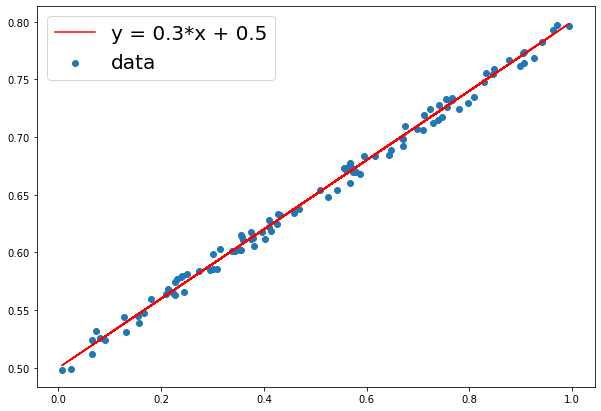

w: 0.3, b: 0.5


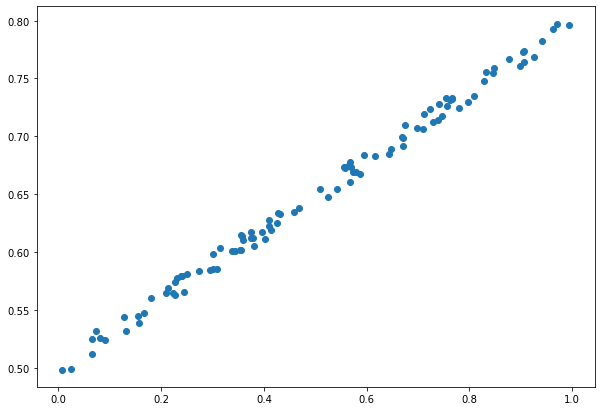

In [5]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()

`이전에는 데이타를 예측하는 직선을 최소제곱법을 이용해서 구했다면
지금은 경사하강법을 사용해서 구해보겠다.`

## 초기값 (Initializer)과 y_hat (예측, prediction) 함수 정의

w, b 값에 대하여 random한 초기 값을 설정해 줍니다.

In [6]:
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

In [7]:
w, b

(-0.4853716661162544, -0.5734991094255075)

`y_hat`은 `prediction`은 값 입니다. 즉, 가설함수에서 실제 값 (y)를 뺀 함수를 정의합니다.

In [8]:
# Hypothesis 함수 정의
y_hat = w * x + b

## 오차(Error) 정의

Loss Function 혹은 Cost Function을 정의 합니다.

Loss (Cost) Function은 예측값인 `y_hat`과 `y`의 차이에 **제곱**으로 정의합니다.

제곱은 오차에 대한 음수 값을 허용하지 않으며, 이는 **Mean Squared Error(MSE)**인 평균 제곱 오차 평가 지표와 관련 있습니다.

In [9]:
# MSE 함수를 그대로 파이썬 코드로 옮겨보자
error = ((y_hat - y) ** 2).mean()

In [11]:
error

2.1942108408276653

## 학습률 (Learning Rate)

In [12]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png', width=600)

한 번 학습할 때 **얼마만큼 가중치(weight)를 업데이트** 해야 하는지 학습 양을 의미합니다.

너무 큰 학습률 (Learning Rate)은 가중치 갱신이 크게 되어 **자칫 Error가 수렴하지 못하고 발산**할 수 있으며,너무 작은 학습률은 가중치 갱신이 작게 되어 **가중치 갱신이 충분히 되지 않고, 학습이 끝나** 버릴 수 있습니다. 즉 과소 적합되어 있는 상태로 남아 있을 수 있습니다.


## Gradient Descent 구현 (단항식)

In [26]:
num_epoch = 5000 # 학습 횟수

learning_rate = 0.5 # 학습률

errors = []

w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_hat = w * x + b
    
    error = ((y_hat - y) ** 2).mean()
    if error < 0.0005:
        break
    
    w = w - learning_rate*((y_hat - y) * x).mean()
    b = b - learning_rate*((y_hat - y)).mean()
    
    errors.append(error)
    
    
    
    
    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = -0.48503, b = 0.34390 error = 2.42225
 5 w = -0.17935, b = 0.74992 error = 0.01686
10 w = -0.11639, b = 0.72030 error = 0.01272
15 w = -0.06290, b = 0.69195 error = 0.00966
20 w = -0.01631, b = 0.66724 error = 0.00734
25 w = 0.02427, b = 0.64571 error = 0.00558
30 w = 0.05962, b = 0.62696 error = 0.00424
35 w = 0.09041, b = 0.61063 error = 0.00322
40 w = 0.11724, b = 0.59640 error = 0.00245
45 w = 0.14060, b = 0.58401 error = 0.00187
50 w = 0.16095, b = 0.57321 error = 0.00143
55 w = 0.17868, b = 0.56381 error = 0.00109
60 w = 0.19413, b = 0.55562 error = 0.00084
65 w = 0.20758, b = 0.54848 error = 0.00064
------------------------------------------------------------
70 w = 0.2, b = 0.5 error = 0.00049


**시각화**

학습 진행(epoch)에 따른 오차를 시각화 합니다.

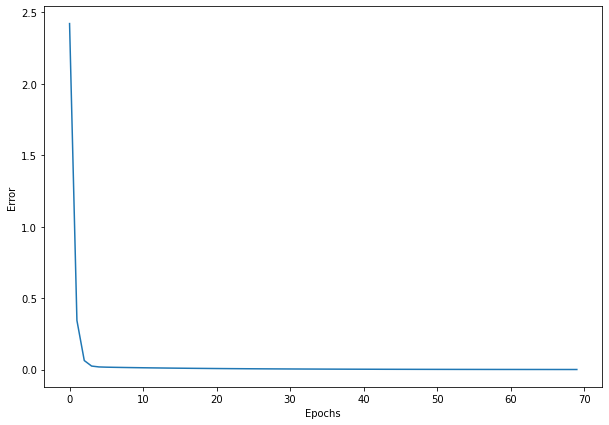

In [27]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 다항식

**샘플 데이터**를 생성합니다.

이번에는 Feature Data, 즉 X 값이 여러 개인 다항식의 경우에 대해서도 구해보도록 하겠습니다.

다항식에서는 X의 갯수 만큼, W 갯수도 늘어날 것입니다.

다만, bias (b)의 계수는 1개인 점에 유의해 주세요.

In [28]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

In [29]:
w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
w3 = np.random.uniform(low=0.0, high=1.0)

b = np.random.uniform(low=0.0, high=1.0)

**다항식을 정의**합니다.

In [30]:
# 정답값을 미리 세팅해 놓자. 정답값에 해당하는 w1, w2, w3, b
y = 0.3* x1 + 0.5 * x2 + 0.7 * x3 + 0.9

## Gradient Descent 구현 (다항식)

In [37]:
errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch=5000
learning_rate=0.5

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
w3 = np.random.uniform(low=0.0, high=1.0)

b = np.random.uniform(low=0.0, high=1.0)


for epoch in range(num_epoch):
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b
    error = ((y_hat - y) ** 2).mean()
    if error < 0.00001:
        break
        
    w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
    w3 = w3 - learning_rate * ((y_hat - y) * x3).mean()
    
    b = b -  learning_rate * ((y_hat - y)).mean()
    
    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)
    # 다항식 Grdien Descent
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))
    
print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

 0 w1 = 0.34864, w2 = 0.56511, w3 = 0.81517, b = 0.77773 error = 0.00296
 5 w1 = 0.34323, w2 = 0.55777, w3 = 0.80033, b = 0.78993 error = 0.00136
10 w1 = 0.33900, w2 = 0.55187, w3 = 0.78814, b = 0.80217 error = 0.00107
15 w1 = 0.33514, w2 = 0.54652, w3 = 0.77749, b = 0.81306 error = 0.00084
20 w1 = 0.33162, w2 = 0.54169, w3 = 0.76817, b = 0.82274 error = 0.00066
25 w1 = 0.32842, w2 = 0.53732, w3 = 0.76001, b = 0.83134 error = 0.00052
30 w1 = 0.32552, w2 = 0.53339, w3 = 0.75286, b = 0.83899 error = 0.00041
35 w1 = 0.32290, w2 = 0.52985, w3 = 0.74659, b = 0.84580 error = 0.00032
40 w1 = 0.32052, w2 = 0.52667, w3 = 0.74108, b = 0.85184 error = 0.00025
45 w1 = 0.31838, w2 = 0.52382, w3 = 0.73624, b = 0.85722 error = 0.00020
50 w1 = 0.31646, w2 = 0.52126, w3 = 0.73199, b = 0.86199 error = 0.00016
55 w1 = 0.31472, w2 = 0.51896, w3 = 0.72824, b = 0.86624 error = 0.00012
60 w1 = 0.31316, w2 = 0.51691, w3 = 0.72495, b = 0.87001 error = 0.00010
65 w1 = 0.31176, w2 = 0.51507, w3 = 0.72205, b = 0.

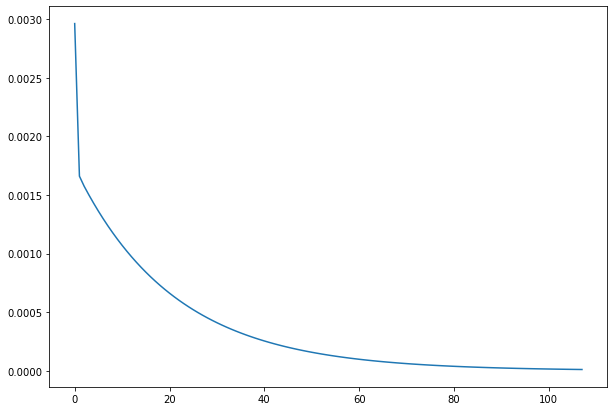

In [38]:
plt.figure(figsize=(10, 7))
plt

plt.plot(errors)

## 가중치 (W1, W2, W3) 값들의 변화량 시각화

`Epoch`가 지남에 따라 어떻게 가중치들이 업데이트 되는지 시각화 해 봅니다.

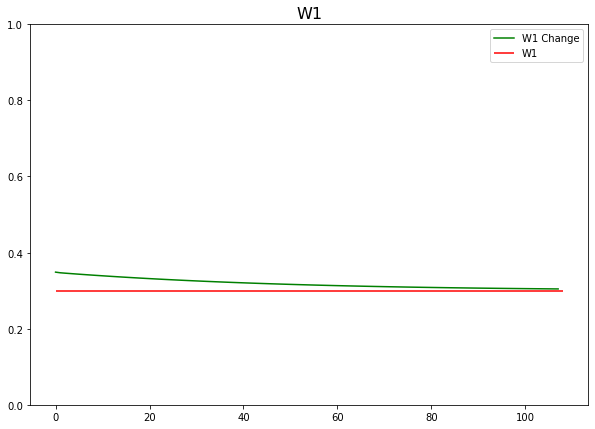

In [39]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.3, xmin=0, xmax=len(w1_grad), color='r')
plt.plot(w1_grad, color='g')
plt.ylim(0, 1)
plt.title('W1', fontsize=16)
plt.legend(['W1 Change', 'W1'])
plt.show()

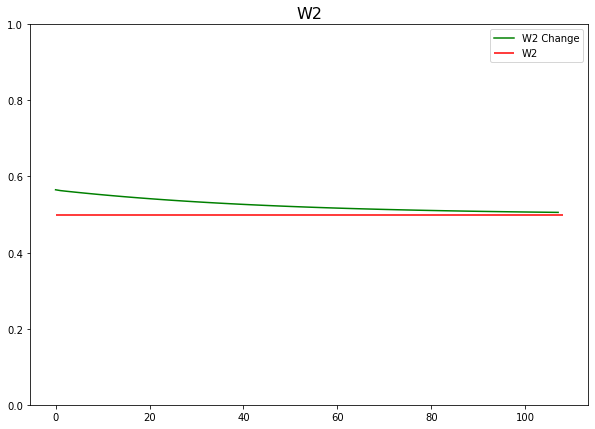

In [42]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.5, xmin=0, xmax=len(w2_grad), color='r')
plt.plot(w2_grad, color='g')
plt.ylim(0, 1)
plt.title('W2', fontsize=16)
plt.legend(['W2 Change', 'W2'])
plt.show()

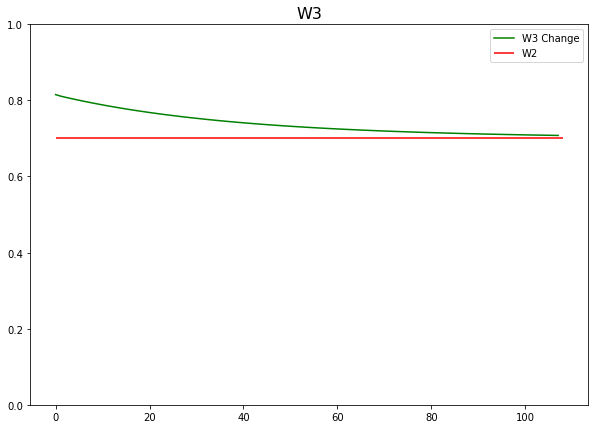

In [43]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.7, xmin=0, xmax=len(w3_grad), color='r')
plt.plot(w3_grad, color='g')
plt.ylim(0, 1)
plt.title('W3', fontsize=16)
plt.legend(['W3 Change', 'W2'])
plt.show()

## 경사하강법을 활용한 SGDRegressor



In [44]:
from sklearn.linear_model import SGDRegressor

In [60]:
model = SGDRegressor(max_iter= 5000, tol = 1e-5, learning_rate='constant') 
## max_iter = 5000 -=> 5000번 학습하겠다.

In [61]:
x1 = x1.reshape(-1, 1)
x2 = x2.reshape(-1, 1)
x3 = x3.reshape(-1, 1)

In [62]:
X = np.concatenate([x1, x2, x3], axis = 1)

In [63]:
X.shape

(100, 3)

In [64]:
model.fit(X, y)

SGDRegressor(learning_rate='constant', max_iter=5000, tol=1e-05)

In [65]:
# 데이터의 w와 b를 뽑아내는게 이 학습의 중점.

In [66]:
model.coef_

array([0.31766584, 0.49568087, 0.67824439])

In [67]:
model.intercept_

array([0.90570532])

In [68]:
print("w1 = {:.1f}, w2 = {:.1f}, w3 = {:.1f}, b = {:.1f}".format(model.coef_[0], model.coef_[1], model.coef_[2], model.intercept_[0]))

w1 = 0.3, w2 = 0.5, w3 = 0.7, b = 0.9
